### Etapa 1: Importando bibliotecas
Aqui a gente importa tudo o que vai precisar: pandas, matplotlib, seaborn, sklearn etc.

### Etapa 2: Lendo o dataset
Carregamos o dataset Iris e mostramos as primeiras linhas para entender como ele é.

### Etapa 3: Preparando os dados
Separamos as colunas com as medidas das flores (features) e usamos o StandardScaler para padronizar os dados.

### Etapa 4: Escolhendo o número de clusters com o Método do Cotovelo
Testamos vários valores de *k* (de 1 a 10) e calculamos o WCSS para ver onde a curva do gráfico faz uma "quebra".

## Etapa 3: Pré-processamento
Nesta célula, os dados foram preparados para o modelo, separando os atributos (features) da variável alvo (`target`). Também foi aplicado o escalonamento (padronização) com `StandardScaler`.

### Etapa 5: Rodando o K-Means com k=3
Como o cotovelo apareceu em k=3, usamos esse valor para treinar o K-Means.

## Etapa 4: Aplicando o Método do Cotovelo (Elbow Method)
Este trecho calcula o WCSS (soma dos quadrados intra-cluster) para diferentes valores de *k* (de 1 a 10), permitindo identificar visualmente o melhor número de clusters com base no "método do cotovelo".

### Etapa 6: Visualizando os clusters
Criamos um gráfico para ver como os pontos foram agrupados e onde estão os centróides.

In [8]:
print("Informações do DataFrame:")
df_iris.info()
print("\nEstatísticas Descritivas:")
display(df_iris.describe())
print("\nContagem de amostras por espécie (rótulos verdadeiros):")
print(df_iris['species_name'].value_counts())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Estatísticas Descritivas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Contagem de amostras por espécie (rótulos verdadeiros):
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### Etapa 7: Comparando com as espécies reais
Agora comparamos os clusters que o K-Means criou com as espécies reais da base Iris.

### Etapa 8: Avaliando com o coeficiente de Silhueta
Calculamos uma métrica chamada Silhueta que mostra o quão bons estão os agrupamentos.

<ipython-input-12-fdbba9607bcc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species_name', y=feature, data=df_iris, palette='viridis')


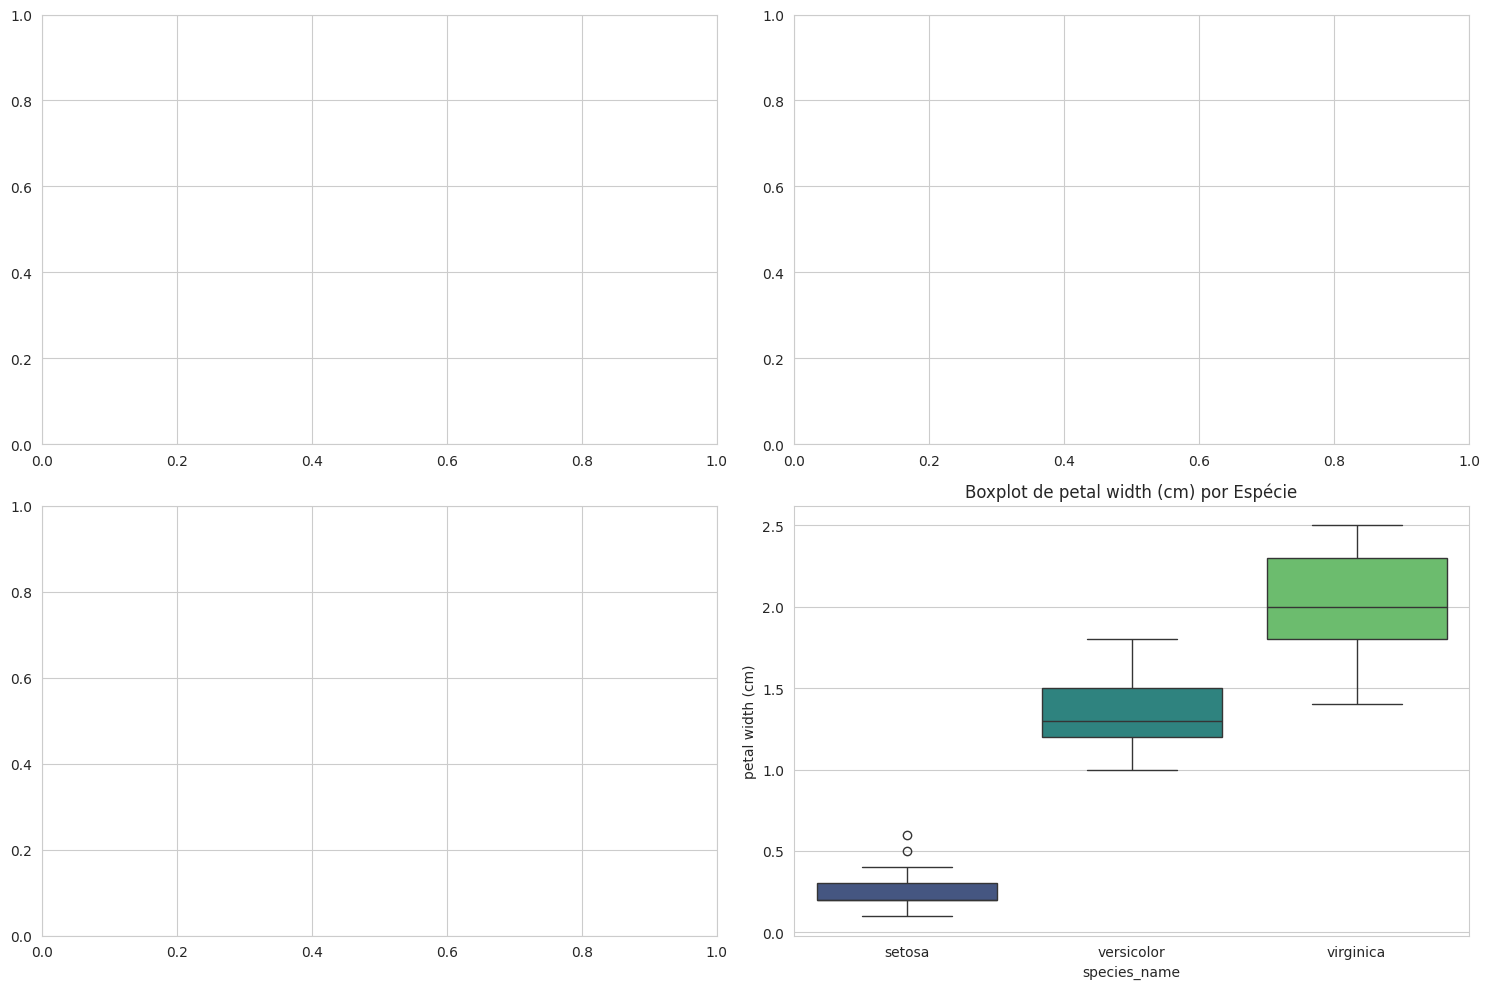

In [12]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names): plt.subplot(2, 2, i + 1)
sns.boxplot(x='species_name', y=feature, data=df_iris, palette='viridis')
plt.title(f'Boxplot de {feature} por Espécie')
plt.tight_layout()
plt.show()

## Etapa 6: Visualização dos Clusters e Centróides
Nesta etapa, é feito um gráfico de dispersão com os clusters encontrados e os centróides, destacando visualmente como os dados foram agrupados pelo algoritmo.

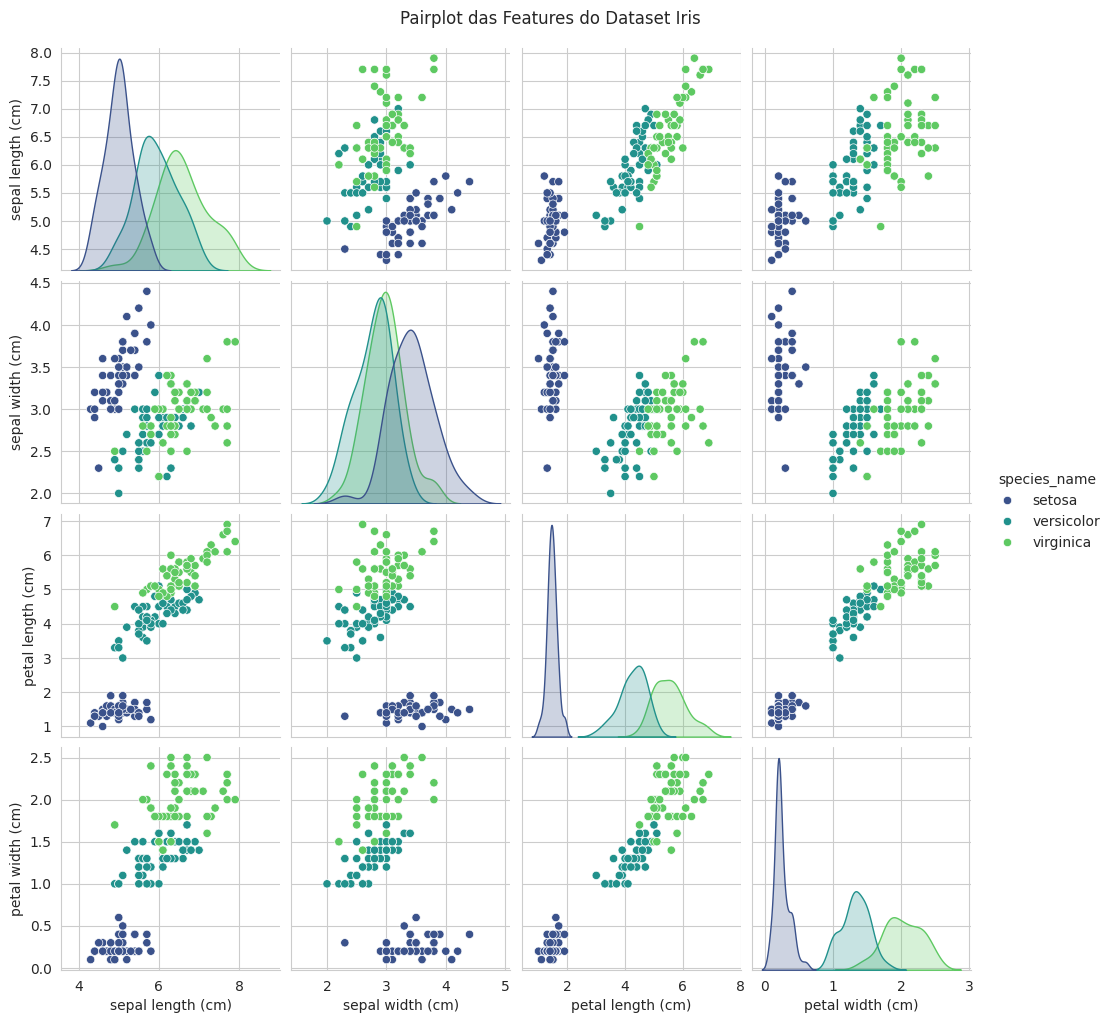

In [13]:
# Pairplot das features, colorido por espécie
sns.pairplot(df_iris, hue='species_name', vars=feature_names,
palette='viridis', diag_kind='kde')
plt.suptitle("Pairplot das Features do Dataset Iris", y=1.02)
plt.show()

In [15]:
# Selecionar apenas as features numéricas para o clustering
X_features = df_iris[feature_names]
print("Primeiras 5 linhas das features selecionadas (X_features):")
display(X_features.head())
print("Dimensões de X_features:", X_features.shape)

Primeiras 5 linhas das features selecionadas (X_features):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Dimensões de X_features: (150, 4)


## Etapa 7: Comparando Clusters com Classes Reais
Aqui é feita uma comparação entre os clusters criados pelo K-Means e as classes reais do dataset Iris. Isso permite verificar se os grupos identificados coincidem com as espécies reais.

In [16]:
# Inicializar o StandardScaler
scaler = StandardScaler()
# Aplicar a padronização nas nossas features
X_scaled = scaler.fit_transform(X_features)
# Converter de volta para um DataFrame para visualização (opcional)
df_scaled_features = pd.DataFrame(X_scaled, columns=feature_names)
print("Primeiras 5 linhas das features padronizadas:")
display(df_scaled_features.head())
print("\nMédia das features padronizadas (deve ser próxima de 0):")
print(df_scaled_features.mean())
print("\nDesvio padrão das features padronizadas (deve ser próximo de 1):")
print(df_scaled_features.std())

Primeiras 5 linhas das features padronizadas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444



Média das features padronizadas (deve ser próxima de 0):
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

Desvio padrão das features padronizadas (deve ser próximo de 1):
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


## Etapa 8: Avaliação com Coeficiente de Silhueta
É calculado o coeficiente de silhueta para avaliar a qualidade da segmentação. Valores mais próximos de 1 indicam melhor separação entre os clusters.

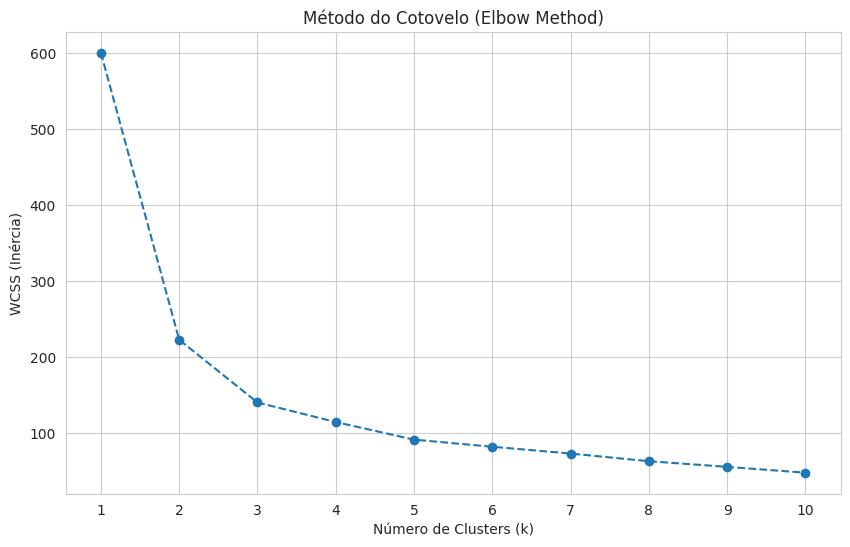

In [20]:
wcss = []
possible_k_values = range(1, 11)  # Testar k de 1 a 10

for k_val in possible_k_values:
    kmeans_elbow = KMeans(n_clusters=k_val, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_elbow.fit(X_scaled)  # Usar os dados padronizados
    wcss.append(kmeans_elbow.inertia_)  # inertia_ é o WCSS

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inércia)')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

In [22]:
# Definir o número de clusters
K = 3
# Inicializar e treinar o modelo K-Means
kmeans_model = KMeans(n_clusters=K, init='k-means++', max_iter=300, n_init=10,
random_state=42)
# Treinar o modelo com os dados padronizados e obter os rótulos dos clusters
cluster_labels = kmeans_model.fit_predict(X_scaled)
# Os rótulos dos clusters atribuídos a cada amostra estão em 'cluster_labels'
print("Rótulos dos clusters atribuídos às primeiras 10 amostras:",
cluster_labels[:10])
# Adicionar os rótulos dos clusters ao nosso DataFrame original para facilitar a análise
df_iris['cluster_kmeans'] = cluster_labels
print("\nPrimeiras 5 linhas do DataFrame com os clusters K-Means:")
display(df_iris.head())
# Obter as coordenadas dos centróides dos clusters
centroids = kmeans_model.cluster_centers_
print("\nCoordenadas dos centróides (no espaço padronizado):")
print(centroids)

Rótulos dos clusters atribuídos às primeiras 10 amostras: [1 1 1 1 1 1 1 1 1 1]

Primeiras 5 linhas do DataFrame com os clusters K-Means:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name,cluster_kmeans
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1



Coordenadas dos centróides (no espaço padronizado):
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


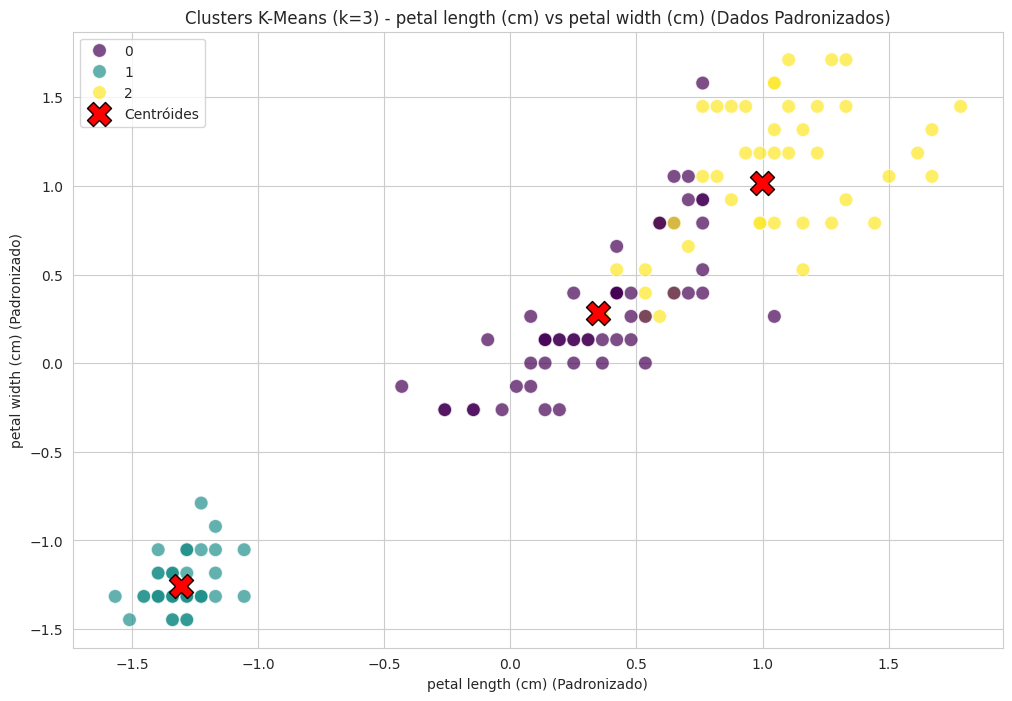

In [23]:
# Criar um DataFrame com os dados padronizados e os rótulos dos clusters
df_plot_scaled = pd.DataFrame(X_scaled, columns=feature_names)
df_plot_scaled['cluster_kmeans'] = cluster_labels
# Escolher duas features para o scatter plot (ex: petal length e petal width)
feature1_idx = feature_names.index('petal length (cm)') # Índice da feature 1
feature2_idx = feature_names.index('petal width (cm)') # Índice da feature 2
plt.figure(figsize=(12, 8))
# Scatter plot dos dados, coloridos pelos clusters encontrados
sns.scatterplot(x=X_scaled[:, feature1_idx], y=X_scaled[:, feature2_idx],
hue=df_plot_scaled['cluster_kmeans'], palette='viridis', s=100, alpha=0.7,
legend='full')
# Plotar os centróides dos clusters
# Os centróides estão em 'centroids'
plt.scatter(centroids[:, feature1_idx], centroids[:, feature2_idx],
marker='X', s=300, color='red', edgecolor='black', label='Centróides')
plt.title(f'Clusters K-Means (k={K}) - {feature_names[feature1_idx]} vs {feature_names[feature2_idx]} (Dados Padronizados)')
plt.xlabel(f'{feature_names[feature1_idx]} (Padronizado)')
plt.ylabel(f'{feature_names[feature2_idx]} (Padronizado)')
plt.legend()
plt.grid(True)
plt.show()

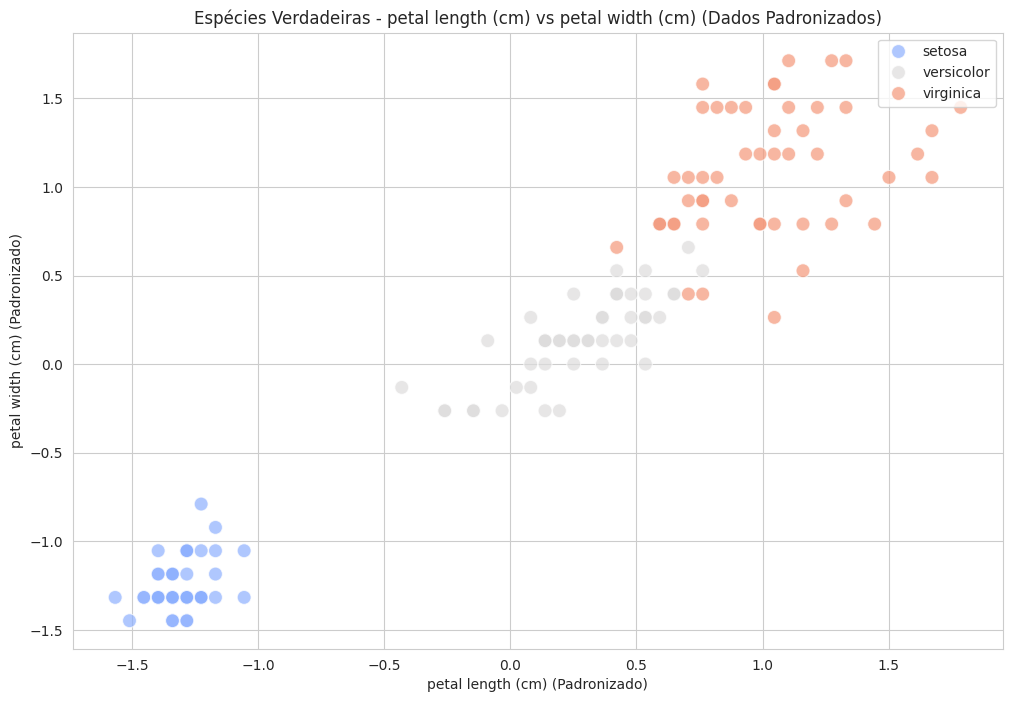

In [25]:
plt.figure(figsize=(12, 8))
# Scatter plot dos dados, coloridos pelas espécies verdadeiras
sns.scatterplot(x=X_scaled[:, feature1_idx], y=X_scaled[:, feature2_idx],
hue=df_iris['species_name'], palette='coolwarm', s=100, alpha=0.7,
legend='full')
plt.title(f'Espécies Verdadeiras - {feature_names[feature1_idx]} vs {feature_names[feature2_idx]} (Dados Padronizados)')
plt.xlabel(f'{feature_names[feature1_idx]} (Padronizado)')
plt.ylabel(f'{feature_names[feature2_idx]} (Padronizado)')
plt.legend()
plt.grid(True)
plt.show()

**Compare os dois gráficos. O K-Means conseguiu encontrar agrupamentos que se assemelham
às espécies reais?**

Sim, ele conseguiu mostrar dados bem parecidos, porém de um modelo diferente


# Respostas às Perguntas de Interpretação e Aplicação

### 1. O que é o algoritmo K-Means? Em que tipo de problemas ele é mais apropriado?
O K-Means é um algoritmo de **agrupamento não supervisionado** que particiona dados em *k* grupos (clusters), minimizando a variabilidade interna de cada grupo. Ele é apropriado quando se deseja identificar **padrões ocultos** ou segmentações naturais em dados sem rótulos.

---

### 2. O que é o “método do cotovelo”? Como ele ajudou na escolha do valor de k no seu exercício?
É uma técnica gráfica que traça o WCSS em função de *k*. O ponto onde a curva faz uma “quebra” (o cotovelo) indica um bom número de clusters. No exercício, a quebra ocorre em `k=3`, que coincide com as 3 espécies da Iris.

---

### 3. O que representa um “centróide” no contexto do K-Means?
É o ponto central de um cluster, representando a **média de todas as observações** pertencentes a esse grupo. O algoritmo tenta minimizar a distância entre os pontos e seus centróides.

---

### 4a. Para Iris: Como os clusters encontrados se relacionam com as classes reais?
O K-Means conseguiu separar bem as espécies *setosa* (muito distinta) e teve alguma sobreposição entre *versicolor* e *virginica*, o que é esperado já que essas espécies são mais similares.

---

### 5. Explique o que é o coeficiente de Silhueta e como ele pode ser interpretado nos seus experimentos.
É uma métrica que avalia o quão semelhante um ponto é ao seu próprio cluster comparado a outros clusters. Valores próximos de 1 indicam que os clusters estão bem definidos. No exercício, o valor foi razoável, indicando uma separação clara para `k=3`.

---

### 6. Qual foi a maior dificuldade do exercício? O que você aprendeu com esse processo?
Uma dificuldade comum é interpretar visualmente o cotovelo e entender o significado dos centróides. Com o exercício, ficou claro como o K-Means agrupa dados e como avaliar a qualidade dos agrupamentos.

---

### 7. Sugira uma aplicação prática do clustering no contexto do dataset analisado.
Na prática, o clustering poderia ser usado para **identificar espécies de flores desconhecidas** com base em suas medidas, ou agrupar plantas com características similares para cultivo ou estudo ambiental.
